Si nuestro dato de salida tiene un valor cualitativo.

In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
diabetes = pd.read_csv("diabetes.csv")

In [ ]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome column es la cual nos ayudara a predecir

In [5]:
diabetes.shape

(768, 9)

In [6]:
feature_cols = ["Pregnancies", "Insulin", "BMI", "Age", "Glucose", "BloodPressure", "DiabetesPedigreeFunction"]
x = diabetes[feature_cols]
y = diabetes.Outcome

Dividimos los datos

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

Llamamos al algoritmo

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0 no tiene, 1 si tiene en base a sus caracteristicas

In [9]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

# Evaluacion del modelo

Los modelos de clasificación son capaces de predecir cuál es la etiqueta correspondiente a cada ejemplo o instancia basado en aquello que ha aprendido del conjunto de datos de entrenamiento. Estos modelos necesitan ser evaluados de alguna manera y posteriormente comparar los resultados obtenidos con aquellos que fueron entrenados.


Los verdaderos positivos (VP) son aquellos que fueron 
clasificados correctamente como positivos como el modelo.

Los verdaderos negativos (VN) corresponden a la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.

Los falsos negativos (FN) es la cantidad de positivos que fueron clasificados incorrectamente como negativos.

Los falsos positivos (FP) indican la cantidad de negativos que fueron clasificados incorrectamente como negativos.

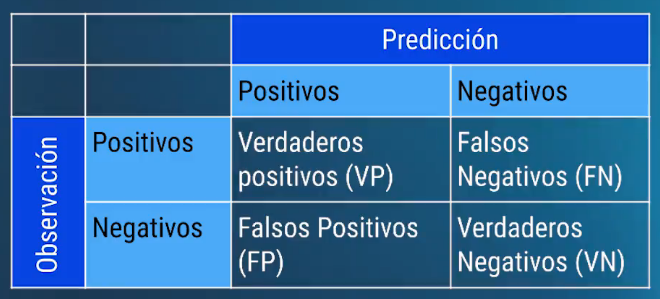

In [11]:
#Hacemos matriz de confusion para validar el modelo

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

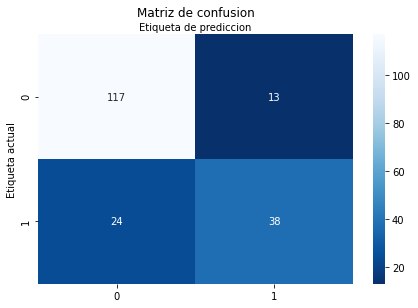

In [14]:
#Graficamos
#Dos tipos, 0 o 1 en base a si tiene diabetes

import numpy as np

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#la mostramos
#Si es mas intenso aquellos que tienen valor superior, mas cercano a 0 sera menos azul
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "Blues_r", fmt = "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y = 1.1)

#Que informacion tenemos, dataset de entrenamiento
plt.ylabel("Etiqueta actual")

#La que encontramos
plt.xlabel("Etiqueta de prediccion")


Segun el grafico: 119 clasificados correctamente, 36 clasificados correctamente cuando es negativo
11 clasificados incorrectamente como negativos y 26 clasificados incorrectamente como positivos

In [16]:
#error del 80% dados nuevos datos podria saber segun caracteristicas tener diabetes

print("Exactitud", metrics.accuracy_score(y_test, y_pred))

Exactitud 0.8072916666666666
